# **Neural Network**
Imagine that you work for SL, and that one of your customers' biggest complaints is that they don't know what's the arrival delay for their buses. You decide to do something about it by building a model to predict the arrival delay at one bus stop. You intend to use the massive amounts of delay data the company has collected over the years to build a machine-learning model.

# **TASK 1:Develop the neural network model for the bus arrival time delay prediction.​**
As discussed in the lecture, the bus arrival time delay prediction problem is modeled as a regression problem. The task will use the simple 2-layers fully connected neural network model as the example and guide you through the step-by-step process of the whole process of the model development.


## Load and prepare the data
Start by loading the dataset and shaping it so that it's suitable for use in machine learning. This dataset is a subset of a much larger dataset. The data requires an amount of prep work before it's of any use at all. We here use url link to load the data. If you cannot load the data via URL link, please download the data from GitHub and upload the data to colab manually.

In [1]:
import pandas as pd

# Define the URL from which to fetch the CSV data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
df = pd.read_csv(url)
# Display the first 10 rows of the DataFrame 'df'.
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:06,10261,44417,3,69,0,82,33,99.925373
1,01/05/2022 07:20,10261,45544,3,35,0,82,52,100.191176
2,01/05/2022 07:35,10261,44410,3,7,0,82,10,99.681159
3,01/05/2022 07:51,10261,41724,3,74,15,82,27,99.385714
4,01/05/2022 20:16,10261,45544,3,-3,0,109,17,116.298507
5,01/05/2022 20:46,10261,44413,3,-17,0,109,-15,115.550725
6,01/05/2022 21:02,10261,45540,3,37,0,109,46,115.428571
7,01/05/2022 21:17,10261,41724,3,0,26,109,16,108.761194
8,01/05/2022 21:31,10261,44417,3,-6,14,109,-36,108.147059
9,01/05/2022 21:46,10261,45544,3,-39,0,109,-18,108.391304


How many rows and columns does the dataset contain?

In [2]:
df.shape

(4962, 9)

Are any of the columns missing values?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           4962 non-null   object 
 1   Stop_id                4962 non-null   int64  
 2   Bus_id                 4962 non-null   int64  
 3   Line_id                4962 non-null   int64  
 4   Arrival_delay          4962 non-null   int64  
 5   Dwell_time             4962 non-null   int64  
 6   Scheduled_travel_time  4962 non-null   int64  
 7   Upstream_stop_delay    4962 non-null   int64  
 8   Recurrent_delay        4962 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 349.0+ KB


For simplicity, we only use 1000 records here. If your computer cannot run this tutorial in a short time, please set a smaller number in the following code. For example, 800.

In [4]:
df = df.iloc[:1000]

Remove columns that are no longer needed.

In [5]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

Draw a histogram by using seaborn to show the distribution of arrival delay.

<Axes: xlabel='Arrival_delay', ylabel='Count'>

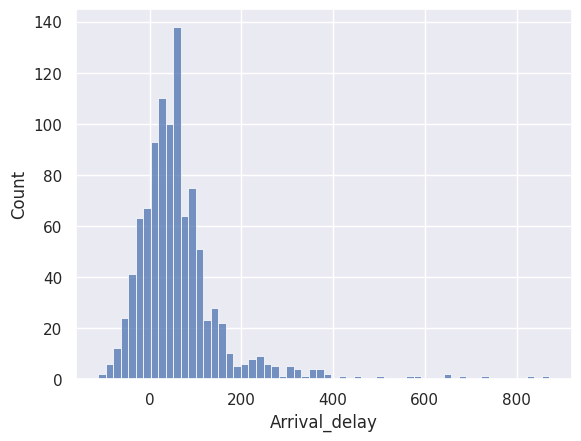

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of the plots using Seaborn.
sns.set()

# Create a histogram plot of the 'Arrival_delay' column from the DataFrame 'df'.
sns.histplot(x=df['Arrival_delay'])


Find out how much influence input variables such as "Upstream_stop_delay" and "Dwell_time" have on the values in the "Arrival_delay" column.

In [13]:
# Calculate the correlation matrix for all columns in the DataFrame 'df'.
corr_matrix = df.corr()
# Sort the correlations between the 'Arrival_delay' column and other columns in descending order.
# This shows the correlation coefficients for each column with respect to 'Arrival_delay'.
correlations_with_arrival_delay = corr_matrix['Arrival_delay'].sort_values(ascending=False)

Feature engineering visually explore and understand the relationships between different features (variables) in a dataset. Seaborn pair plots help identify patterns, correlations, and potential outliers, aiding in the selection and transformation of features to improve model performance. It is a crucial step in data preprocessing to enhance the accuracy and effectiveness of machine learning models.​

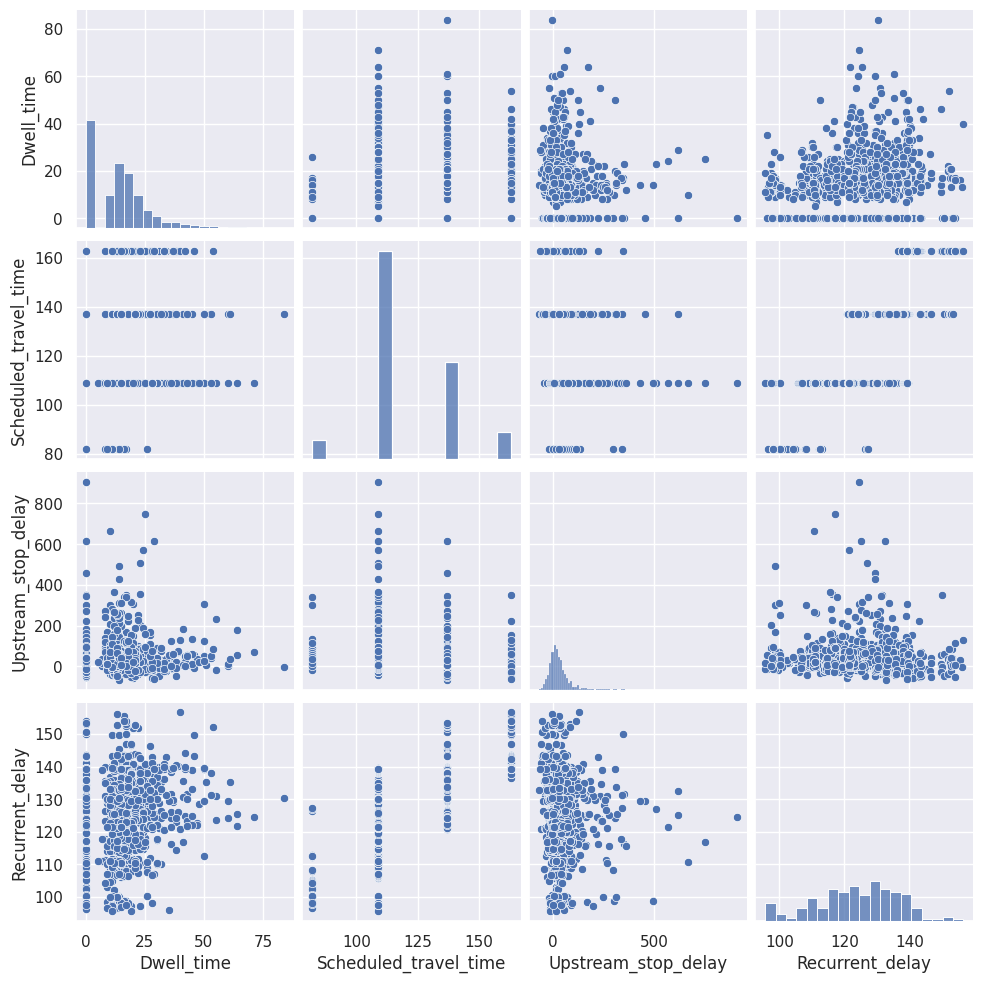

In [8]:
# Create a DataFrame 'x' containing all columns except 'Arrival_delay'.
x = df.drop(['Arrival_delay'], axis=1)
# Create a Series 'y' containing only the 'Arrival_delay' column.
y = df['Arrival_delay']
# Use Seaborn's pairplot to visualize pairwise relationships between the features in 'x'.
sns.pairplot(x)

## Create a neural network model
Now it's time build a neural network and train it with the data prepared in the previous exercise. We'll try neural network first and use cross-validation its meaasure accuracy.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model, which is a linear stack of layers.
model = Sequential()
# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))
# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
# Display a summary of the model architecture, including the number of parameters.
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,337 (9.13 KB)

 Trainable params: 2,337 (9.13 KB)

 Non-trainable params: 0 (0.00 B)

## Training and prediction
We split the dataset into a training and a test dataset. Then, we fit the neural network model with the training dataset and predict the values for the test dataset.

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 60.6530 - mae: 60.6530 - val_loss: 43.4901 - val_mae: 43.4901
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.3736 - mae: 48.3736 - val_loss: 35.0034 - val_mae: 35.0034
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.2027 - mae: 38.2027 - val_loss: 33.4764 - val_mae: 33.4764
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.0734 - mae: 30.0734 - val_loss: 34.5987 - val_mae: 34.5987
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.4832 - mae: 30.4832 - val_loss: 33.0173 - val_mae: 33.0173
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.9622 - mae: 29.9622 - val_loss: 33.3013 - val_mae: 33.3013
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.4162 - mae: 30.4162 - val_loss: 32.5048 - val_mae: 32.5048
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.0462 - mae: 29.0462 - val_loss: 33.4010 - val_mae: 33.4010
Epoch 9/200
20/20 ━━━━━━━━━━━━━

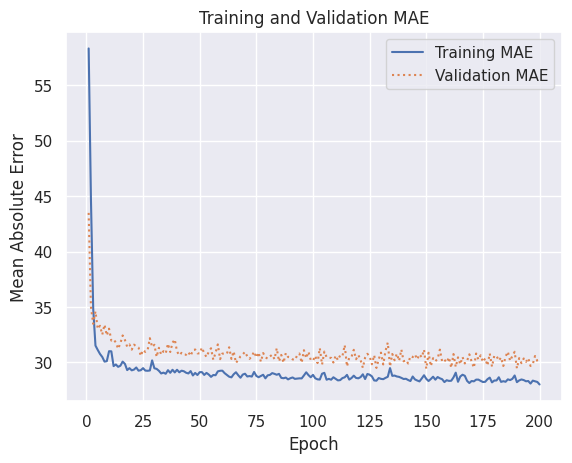

In [10]:
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets, with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Fit the model to the training data, specifying validation split, epochs, and batch size.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)
# Set the style of the plots using Seaborn.
sns.set()
# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']
# Define the number of epochs.
epochs = range(1, len(err) + 1)
# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()
# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

## Evaluate the model
You can evaluate the model's performance using various metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R2).

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE) between the true and predicted values.
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE) between the true and predicted values.
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R2) score, a measure of how well the model explains the variance in the data.
r2 = r2_score(y_test, y_pred)
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 26.993755564540624
Mean Squared Error: 1332.2286869204693
R-squared: 0.8870800329757457


## Visualize the Results
we create a "Actual vs. Predicted Values" graph to give a visual inspection of the prediction quality.

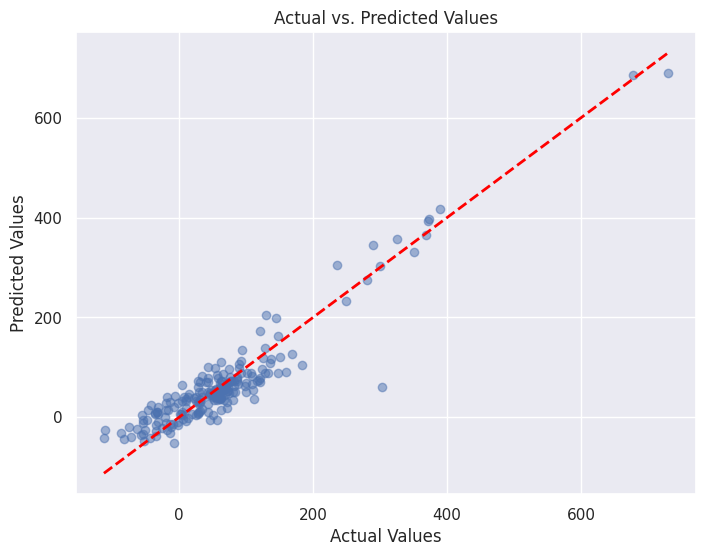

In [14]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

# **Task 2: Practical NN training techniques**
The task will illustrate some useful NN training techniques, including saving and loading the trained model, using the callback function to save the best model, and adding dropout layers.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 43.41805, saving model to weights.best.keras

Epoch 2: val_mae improved from 43.41805 to 36.09092, saving model to weights.best.keras

Epoch 3: val_mae improved from 36.09092 to 30.96083, saving model to weights.best.keras

Epoch 4: val_mae did not improve from 30.96083

Epoch 5: val_mae did not improve from 30.96083

Epoch 6: val_mae did not improve from 30.96083

Epoch 7: val_mae did not improve from 30.96083

Epoch 8: val_mae did not improve from 30.96083
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 32.182769604325294
Mean Squared Error: 1815.7358413169827
R-squared: 0.8460978709291895


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
--------------------------------------this is result of the model loaded from the local path---------------------------------------------
Mean Absolute Error: 32.182769604325294
Mean Squared Error: 1815.7358413169827
R-squared: 0.8460978709291895


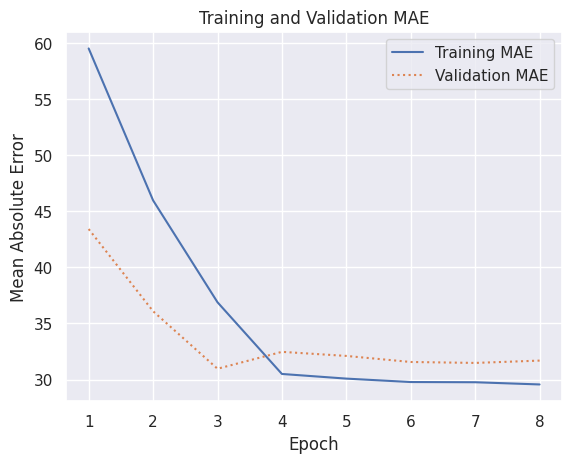

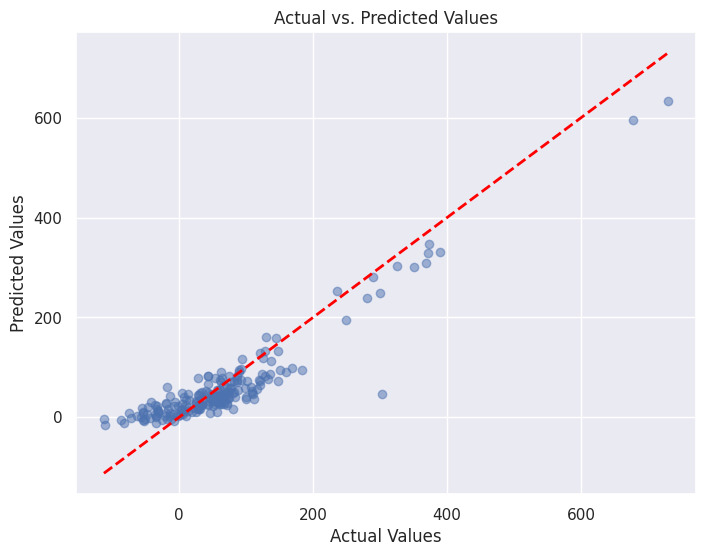

In [16]:
from json import load
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can choose to add the dropout layer or not***************************

def construct_network_model():
  # Create a Sequential model, which is a linear stack of layers.
  model = Sequential()

  # Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
  model.add(Dense(32, activation='relu', input_dim=4))

  # # Add a Dropout layer with a dropout rate of 0.5.
  # model.add(Dropout(0.5))

  # Add another Dense layer with 64 units and ReLU activation.
  model.add(Dense(64, activation='relu'))

  # # Add another Dropout layer with a dropout rate of 0.5.
  # model.add(Dropout(0.5))

  # Add a final Dense layer with 1 unit (typically used for regression tasks).
  model.add(Dense(1))
  return model

model=construct_network_model()
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can choose to add the dropout layer or not*****************


#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can choose to use the callback function or not**************
# Do not use the callback function
# hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)

# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.keras"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save thhe model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function or not*************

#-------------------------------------------------model evaluation--------------------------------------------------------------------

# Set the style of the plots using Seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#-------------------------------------------------load model and evaluation--------------------------------------------------------------------
if not filepath =="":
  # Load a pre-trained model from the specified file path.
  model = load_model(filepath)

  # Use the loaded model to predict on the test data.
  y_pred = model.predict(X_test)

  # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")



  # Create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a diagonal line for reference (perfect predictions)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

  # Show the plot
  plt.show()


# **Task 3: Compare the results with a linear regression model**
The task involves comparing the results obtained from the neural network with those from the linear regression model, and we should analyze the reasons behind any differences in the outcomes.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.keras"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the neural network model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Create a Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('--------------------------------------'+'this is result of the linear regression model'+"---------------------------------------------")
print(f"Mean Absolute Error of linear model: {mae_linear}")
print(f"Mean Squared Error of linear model: {mse_linear}")
print(f"R-squared of linear model: {r2_linear}")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 44.66304, saving model to weights.best.keras

Epoch 2: val_mae improved from 44.66304 to 36.61042, saving model to weights.best.keras

Epoch 3: val_mae improved from 36.61042 to 31.89442, saving model to weights.best.keras

Epoch 4: val_mae did not improve from 31.89442

Epoch 5: val_mae did not improve from 31.89442

Epoch 6: val_mae did not improve from 31.89442

Epoch 7: val_mae did not improve from 31.89442

Epoch 8: val_mae did not improve from 31.89442


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
--------------------------------------this is result of the neural network model---------------------------------------------
Mean Absolute Error: 32.491040228903294
Mean Squared Error: 2002.6939523084554
R-squared: 0.8302512644603902
--------------------------------------this is result of the linear regression model---------------------------------------------
Mean Absolute Error of linear model: 27.21289652419807
Mean Squared Error of linear model: 1369.2194384581421
R-squared of linear model: 0.8839446895584742


**In general, deep learning models tend to outperform linear regression models. Why is the performance of the neural network worse than that of the linear regression model? **

# **Assignment task: Find the best neural network model for the bus delay prediction(assignment submission)**
Tuning the neural network models (e.g., dropout, sizing of the network), and finding the best neural network model.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 37.39460, saving model to weights.best.keras

Epoch 2: val_mae improved from 37.39460 to 34.81645, saving model to weights.best.keras

Epoch 3: val_mae improved from 34.81645 to 32.28291, saving model to weights.best.keras

Epoch 4: val_mae improved from 32.28291 to 32.18072, saving model to weights.best.keras

Epoch 5: val_mae improved from 32.18072 to 32.03364, saving model to weights.best.keras

Epoch 6: val_mae did not improve from 32.03364

Epoch 7: val_mae did not improve from 32.03364

Epoch 8: val_mae did not improve from 32.03364

Epoch 9: val_mae improved from 32.03364 to 31.51081, saving model to weights.best.keras

Epoch 10: val_mae improved from 31.51081 to 31.19893, saving model to weights.best.keras

Epoch 11: val_mae did not improve from 31.19893

Epoch 12: val_mae improved from 31.19893 to 31.03986, saving model to weights.best.keras

Epoch 13: val_mae improved from 31.03986 to 30.70518, saving model to weights.best.keras

Epoch 1

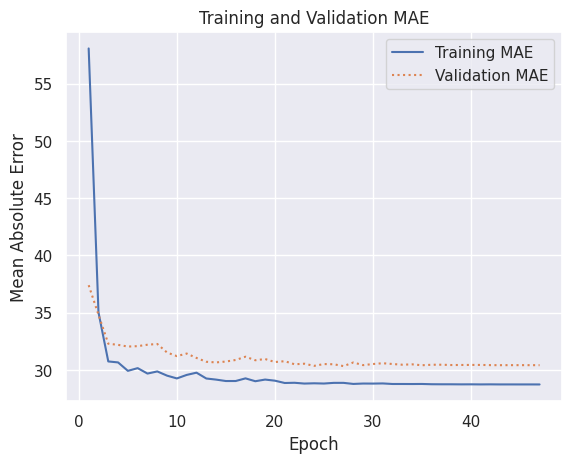

In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(64, activation='relu', input_dim=4, kernel_regularizer=l2(0.01)))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer=Adam(learning_rate=0.0008), loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=20, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.keras"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
